In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('fraudTest.csv')
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [6]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [7]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [8]:
print("Rows & Cloumns")
df.shape

Rows & Cloumns


(555719, 23)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [10]:
print("Missing value in the dataset")
df.isnull().sum()

Missing value in the dataset


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
print("Duplicate values in the dataset")
df.duplicated().sum()

Duplicate values in the dataset


np.int64(0)

In [12]:
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [13]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [14]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [15]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [16]:
# Create 'age' from dob and transaction date
df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365
# Convert gender from 'M', 'F' to 'Male', 'Female'
df['gender'] = df['gender'].replace({'M': 'Male', 'F': 'Female'})
#Combine first and last into a single 'name' column
df['name'] = df['first'] + ' ' + df['last']
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,name
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,Male,351 Darlene Green,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,52,Jeff Elliott
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,Female,3638 Marsh Union,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,30,Joanne Williams
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,Female,9333 Valentine Point,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,49,Ashley Lopez
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,Male,32941 Krystal Mill Apt. 552,...,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,32,Brian Williams
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,Male,5783 Evan Roads Apt. 465,...,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,65,Nathan Massey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,Male,558 Michael Estates,...,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,54,Michael Olson
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,Male,572 Davis Mountains,...,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,21,Jose Vasquez
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,Female,144 Evans Islands Apt. 683,...,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,39,Ann Lawson
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,Male,7020 Doyle Stream Apt. 951,...,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,55,Eric Preston


In [17]:
#Removing the unwanted columns in the dataset
df.drop(columns=['Unnamed: 0', 'trans_date_trans_time', 'dob', 'trans_num','city_pop','merch_lat','merch_long' ], inplace=True)
df.drop(columns=['merchant', 'first', 'last','lat','long'], inplace=True)
df

,cc_num,category,amt,gender,street,city,state,zip,job,unix_time,is_fraud,age,name
0,2291163933867244,personal_care,2.86,Male,351 Darlene Green,Columbia,SC,29209,Mechanical engineer,1371816865,0,52,Jeff Elliott
1,3573030041201292,personal_care,29.84,Female,3638 Marsh Union,Altonah,UT,84002,"Sales professional, IT",1371816873,0,30,Joanne Williams
2,3598215285024754,health_fitness,41.28,Female,9333 Valentine Point,Bellmore,NY,11710,"Librarian, public",1371816893,0,49,Ashley Lopez
3,3591919803438423,misc_pos,60.05,Male,32941 Krystal Mill Apt. 552,Titusville,FL,32780,Set designer,1371816915,0,32,Brian Williams
4,3526826139003047,travel,3.19,Male,5783 Evan Roads Apt. 465,Falmouth,MI,49632,Furniture designer,1371816917,0,65,Nathan Massey
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,health_fitness,43.77,Male,558 Michael Estates,Luray,MO,63453,Town planner,1388534347,0,54,Michael Olson
555715,3556613125071656,kids_pets,111.84,Male,572 Davis Mountains,Lake Jackson,TX,77566,Futures trader,1388534349,0,21,Jose Vasquez
555716,6011724471098086,kids_pets,86.88,Female,144 Evans Islands Apt. 683,Burbank,WA,99323,Musician,1388534355,0,39,Ann Lawson
555717,4079773899158,travel,7.99,Male,7020 Doyle Stream Apt. 951,Mesa,ID,83643,Cartographer,1388534364,0,55,Eric Preston


In [18]:
# Specify desired order
desired_order = ['name','age','gender','cc_num', 'category', 'amt','street', 'city', 'state', 'zip', 'job', 'unix_time', 'is_fraud']

# Reorder columns
df = df[desired_order]

In [19]:
# Suppose df is your processed dataset
df.to_csv("processed_data.csv", index=False)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("processed_data.csv")

# Basic summary
total_transactions = len(df)
fraud_count = df['is_fraud'].sum()
non_fraud_count = total_transactions - fraud_count

print(f"Total Transactions: {total_transactions}")
print(f"Fraudulent Transactions: {fraud_count}")
print(f"Non-Fraudulent Transactions: {non_fraud_count}")

Total Transactions: 555719
Fraudulent Transactions: 2145
Non-Fraudulent Transactions: 553574


c:\praabhass\python\fraud\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


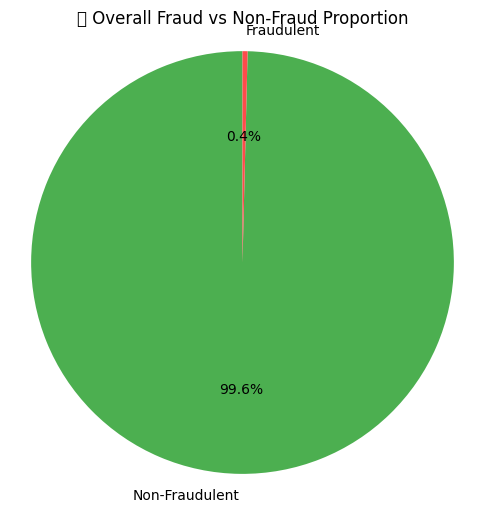

In [28]:
# 1️⃣ Pie Chart: Overall Fraud vs Non-Fraud Proportion
plt.figure(figsize=(6, 6))
plt.pie([non_fraud_count, fraud_count],
        labels=['Non-Fraudulent', 'Fraudulent'],
        autopct='%1.1f%%',
        colors=['#4caf50', '#ff4b4b'],
        startangle=90)
plt.axis('equal')
plt.title('📊 Overall Fraud vs Non-Fraud Proportion')
plt.show()

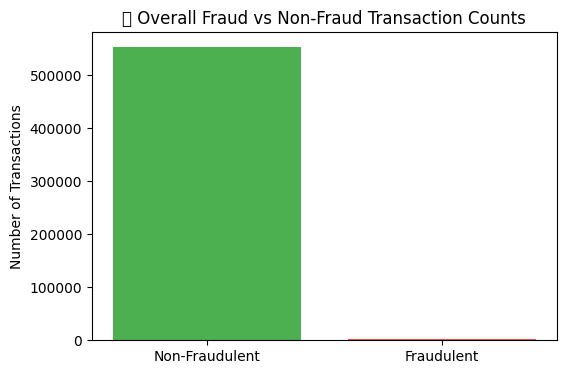

In [29]:
# 2️⃣ Bar Chart: Fraud vs Non-Fraud Counts
plt.figure(figsize=(6, 4))
plt.bar(['Non-Fraudulent', 'Fraudulent'],
        [non_fraud_count, fraud_count],
        color=['#4caf50', '#ff4b4b'])
plt.ylabel("Number of Transactions")
plt.title("📊 Overall Fraud vs Non-Fraud Transaction Counts")
plt.show()

In [37]:
# 3️⃣ Time Series Analysis (if 'timestamp' column exists)
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    time_summary = df.groupby([df['timestamp'].dt.date, 'is_fraud']).size().unstack(fill_value=0)

    plt.figure(figsize=(10, 5))
    time_summary.plot(kind='line', marker='o')
    plt.xlabel('Date')
    plt.ylabel('Number of Transactions')
    plt.title('📆 Fraud vs Non-Fraud Transactions Over Time')
    plt.legend(['Non-Fraud', 'Fraud'])
    plt.grid(True)
    plt.show()

c:\praabhass\python\fraud\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


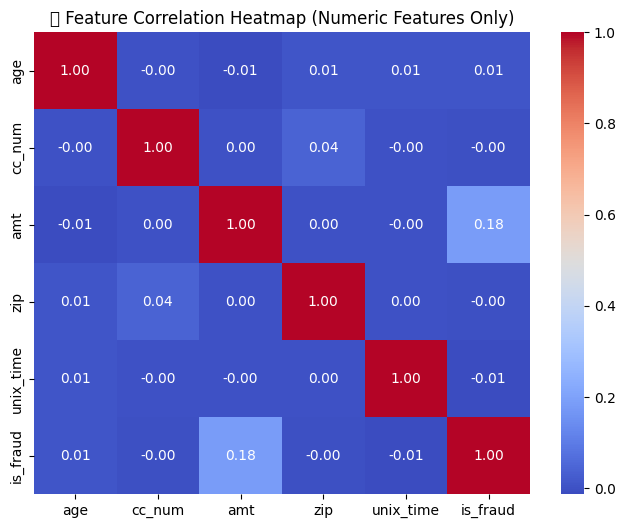

In [33]:
# 4️⃣ Correlation Heatmap of Numeric Features Only
plt.figure(figsize=(8, 6))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_df = numeric_df.corr()

sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('🔥 Feature Correlation Heatmap (Numeric Features Only)')
plt.show()


In [21]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Load processed data
df = pd.read_csv("processed_data.csv")

# Preserve original columns for later use in Streamlit
original_df = df.copy()

# Identify columns NOT to use as features (but retain them in DataFrame)
non_feature_cols = ['name', 'street', 'cc_num', 'zip', 'unix_time', 'is_fraud']

# Encode categorical features (excluding target and non-feature columns)
cat_cols = df.select_dtypes(include='object').columns.difference(['name', 'street'])

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Prepare model input
X = df.drop(columns=non_feature_cols)
y = df['is_fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optionally, attach predictions back to the original test data
X_test_full = original_df.iloc[X_test.index]
X_test_full['predicted_fraud'] = y_pred

# Save selected (predicted as fraud) to CSV (optional for Streamlit download)
selected = X_test_full[X_test_full['predicted_fraud'] == 1]
selected.to_csv("predicted_fraudulent.csv", index=False)


c:\praabhass\python\fraud\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:28:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
[[110626     92]
 [   174    252]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.73      0.59      0.65       426

    accuracy                           1.00    111144
   macro avg       0.87      0.80      0.83    111144
weighted avg       1.00      1.00      1.00    111144



C:\Users\Praabhass\AppData\Local\Temp\ipykernel_23080\2638465192.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_full['predicted_fraud'] = y_pred


In [25]:
%%writefile app.Py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
import base64

# Page setup
st.set_page_config(page_title="Fraud Checker", layout="centered")

# Set background image
def set_background(image_file):
    with open(image_file, "rb") as f:
        encoded = base64.b64encode(f.read()).decode()
    css = f"""
    <style>
    .stApp {{
        background-image: url("data:image/jpg;base64,{encoded}");
        background-size: cover;
        background-repeat: no-repeat;
        background-attachment: fixed;
    }}
    </style>
    """
    st.markdown(css, unsafe_allow_html=True)

set_background("cosmic-background-with-colorful-laser-lights-with-cool-shapes-perfect-digital-wallpaper (1).jpg")

# Title
st.title("🔍 Credit Card Fraud Detection Viewer")

# Load data
@st.cache_data
def load_data():
    return pd.read_csv("processed_data.csv")

df = load_data()

# Dropdown input for credit card numbers
cc_numbers = df['cc_num'].unique().tolist()
cc_input = st.selectbox("🔐 Select Credit Card Number", options=cc_numbers)

# Process input
if cc_input:
    filtered_df = df[df['cc_num'] == cc_input]

    if filtered_df.empty:
        st.warning("No data found for the selected credit card number.")
    else:
        st.subheader("🧾 All Transactions for this Credit Card")
        st.dataframe(filtered_df)

        # Count summary
        total_count = len(filtered_df)
        fraud_count = filtered_df['is_fraud'].sum()
        non_fraud_count = total_count - fraud_count

        st.markdown("---")
        st.markdown("### 📊 Transaction Summary")
        st.info(f"🔢 Total Transactions: **{total_count}**")
        st.error(f"🔴 Fraudulent Transactions: **{fraud_count}**")
        st.success(f"🟢 Non-Fraudulent Transactions: **{non_fraud_count}**")

        # Pie chart visualization
        st.markdown("### 📈 Fraud vs Non-Fraud Pie Chart")
        labels = ['Fraudulent', 'Non-Fraudulent']
        values = [fraud_count, non_fraud_count]
        colors = ['#ff4b4b', '#4caf50']

        fig, ax = plt.subplots()
        ax.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize': 12})
        ax.axis('equal')

        st.pyplot(fig)

        # Show fraud details
        fraud_df = filtered_df[filtered_df['is_fraud'] == 1]
        if not fraud_df.empty:
            st.subheader("🔴 Fraudulent Transactions")
            st.dataframe(fraud_df)

            def convert_df_to_excel(dataframe):
                output = BytesIO()
                with pd.ExcelWriter(output, engine='openpyxl') as writer:
                    dataframe.to_excel(writer, index=False, sheet_name='FraudData')
                output.seek(0)
                return output

            excel_data = convert_df_to_excel(fraud_df)

            st.download_button(
                label="📥 Download Fraud Details as Excel",
                data=excel_data,
                file_name=f"fraud_transactions_{cc_input}.xlsx",
                mime="application/vnd.openxmlformats-officedocument.spreadsheetml.sheet"
            )
        else:
            st.success("✅ No Fault Detected: All transactions are safe.")



Overwriting app.Py
